In [1]:
import importlib
import os, pandas as pd, numpy as np
from joblib import dump, load
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
# from sod.core.evaluation import normalize
import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)
import sod.core.plot as sod_plot
importlib.reload(sod_plot)
# from sod.core.dataset import open_dataset # , normalize_df
# from sod import plot
isoutl = sod_core_dataset.is_outlier

dataframe = sod_core_dataset.open_dataset('allset_train.hdf', normalize=False, verbose=False)
print(sod_core_dataset.dfinfo(dataframe))

clf_iso_cont_5perc = load(os.path.abspath(os.path.join(os.getcwd(), '..', 'evaluations', 'results', 
                                                       'cv.globalset.iforest.yaml', 'models',
                         'IsolationForest?features=psd@2sec,psd@5sec&contamination=0.05&max_samples=512&n_estimators=100&behaviour=new.model')))
# print(str(clf50))
# print(str(clf_iso_cont_5perc))


# Copriamo tutti i casi: frequenze basse e frequenze medio alte (locali)
# psd0.2 psd5


ok (1451765 instances)
                         Min      Median           Max    #NAs  #<1Perc.  #>99Perc.
psd@0.05sec     -3076.526611 -121.268117    -18.616519  614002         0       8378
psd@0.1sec      -3076.526611 -123.085388    -18.540183       0     14518      14518
psd@0.2sec      -3076.526611 -124.808643    -18.394193       1     14518      14518
psd@0.5sec      -3076.526611 -126.766839    -17.799973       4     14518      14518
psd@1sec        -3076.526611 -124.398356    -17.364621      10     14518      14518
psd@2sec        -3076.526611 -121.330894    -14.675753      21     14518      14518
psd@3sec        -3076.526611 -121.021820     -7.249915      54     14518      14518
psd@5sec        -3076.526611 -122.757093      7.845090      56     14518      14518
psd@9sec        -3076.526611 -131.116604     19.164349   27289     14245      14245
amplitude_ratio     0.000000    0.001165     36.623112       0     14481      11927
magnitude           0.900000    4.400000      8.9000

In [ ]:
clf_iso_cont_5perc = load(os.path.abspath(os.path.join(os.getcwd(), '..', 'evaluations', 'results', 
                                                       'cv.globalset.iforest.yaml', 'models',
                         'IsolationForest?features=psd@2sec,psd@5sec&contamination=0.05&max_samples=512&n_estimators=100&behaviour=new.model')))


In [2]:
import matplotlib.pyplot as plt
from contextlib import contextmanager

@contextmanager
def plotparams(params):
    '''makes temporarily matplotlib params.
    Make sure to run this after %matplotlib inline.
    For info see https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger'''
    def_params = {k: plt.rcParams[k] for k in params}
    for k, v in params.items():
        plt.rcParams[k] = v
    try:
        yield
    finally:
        for k, v in def_params.items():
            plt.rcParams[k] = v

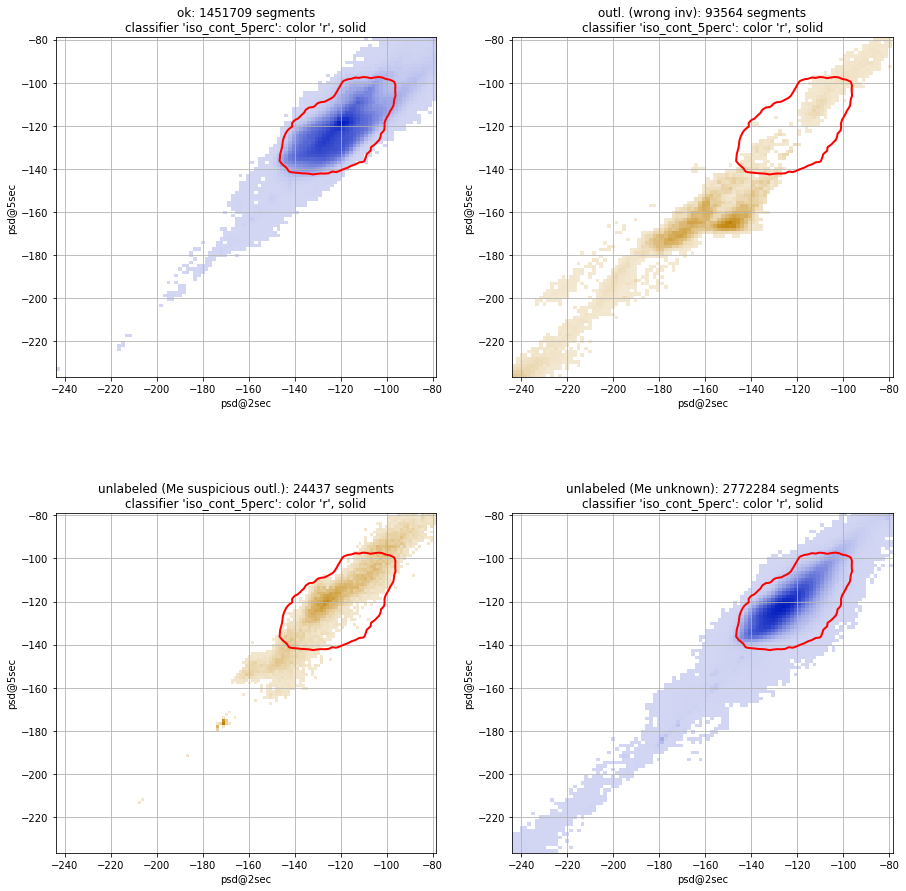

In [3]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

%matplotlib inline
with plotparams({'figure.figsize': (15, 15)}):
    fig = sod_plot.plot(dataframe, 'psd@2sec', 'psd@5sec', axis_lim=.9901,
                        clfs={'iso_cont_5perc': clf_iso_cont_5perc}
                       )

In [17]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)

import sod.core.evaluation as sod_core_eval
importlib.reload(sod_core_eval)

dinfo = sod_core_dataset.dataset_info
sel = dinfo(dataframe).class_selector[dinfo(dataframe).classnames[0]]
print(sel)
%matplotlib inline


# fake a new set where the chile dataset (dataset_id=3) is an outlier class. This way, we can
# see the distribution of the chile data
from sod.core import pdconcat

dfake = dataframe[sel(dataframe) | (dataframe.dataset_id == 3)]
assert not dfake['outlier'].any()
dfake.loc[dfake.dataset_id == 3, 'outlier'] = True
print(len(dfake))

# dfake.rename({'allset_train.id': 'id'}, inplace=True, axis=1)

print(sod_core_dataset.dfinfo(dfake))

<function globalset.<lambda> at 0x1927a5510>


/Users/riccardo/work/gfz/projects/sources/python/sod/.env/sod/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


1451765

ok (1292496 instances)
                         Min      Median           Max    #NAs  #<1Perc.  #>99Perc.
psd@0.05sec     -3076.526611 -121.308497    -18.616519  459884         0       8327
psd@0.1sec      -3076.526611 -125.424136    -18.540183       0     12925      12925
psd@0.2sec      -3076.526611 -127.765697    -18.394193       1     12925      12925
psd@0.5sec      -3076.526611 -129.623496    -17.799973       4     12925      12925
psd@1sec        -3076.526611 -126.375366    -17.364621      10     12925      12924
psd@2sec        -3076.526611 -122.544242    -14.675753      21     12925      12925
psd@3sec        -3076.526611 -121.844490     -7.249915      54     12925      12925
psd@5sec        -3076.526611 -123.907524      7.845090      56     12925      12924
psd@9sec        -3076.526611 -132.449921     19.164349   27289     12653      12653
amplitude_ratio     0.000000    0.001026     36.623112       0     12907      11374
magnitude           0.900000    4.700000    

/Users/riccardo/work/gfz/projects/sources/python/sod/sod/core/plot.py:99: UserWarning: Dataframe is not bound to any implemented dataset, splitting classes based on the"outlier" column
  "\"%s\" column" % OUTLIER_COL)


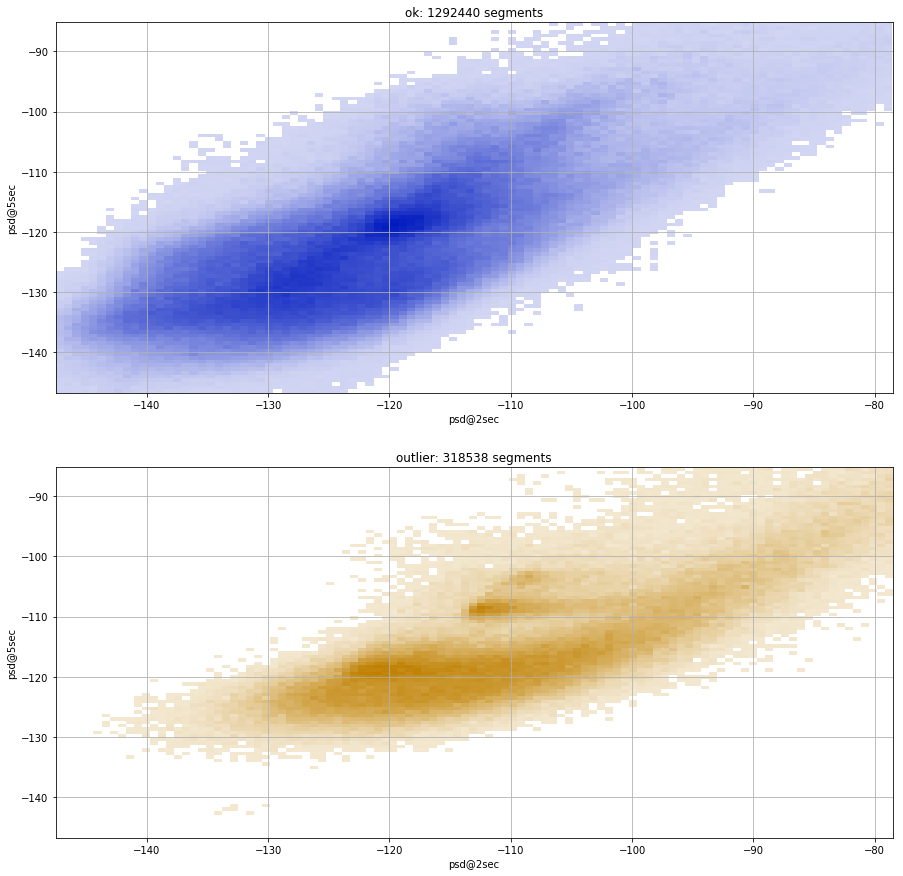

In [8]:
import importlib
import sod.core.plot as sod_plot
importlib.reload(sod_plot)

import sod.core.dataset as sod_core_dataset
importlib.reload(sod_core_dataset)

sel = sod_core_dataset.dataset_info(dataframe).class_selector[sod_core_dataset.dataset_info(dataframe).classnames[0]]

%matplotlib inline


# fake a new set where the chile dataset (dataset_id=3) is an outlier class. This way, we can
# see the distribution of the chile data
from sod.core import pdconcat

dfake = pdconcat([dataframe[dataframe.dataset_id==3], dataframe[sel(dataframe)]])
dfake.loc[dfake.dataset_id == 3, 'outlier'] = True

dfake.rename({'allset_train.id': 'id'}, inplace=True, axis=1)

with plotparams({'figure.figsize': (15, 15)}):
    fig = sod_plot.plot(dfake, 'psd@2sec', 'psd@5sec', axis_lim=.990)

/Users/riccardo/work/gfz/projects/sources/python/sod/sod/core/plot.py:99: UserWarning: Dataframe is not bound to any implemented dataset, splitting classes based on the"outlier" column
  "\"%s\" column" % OUTLIER_COL)


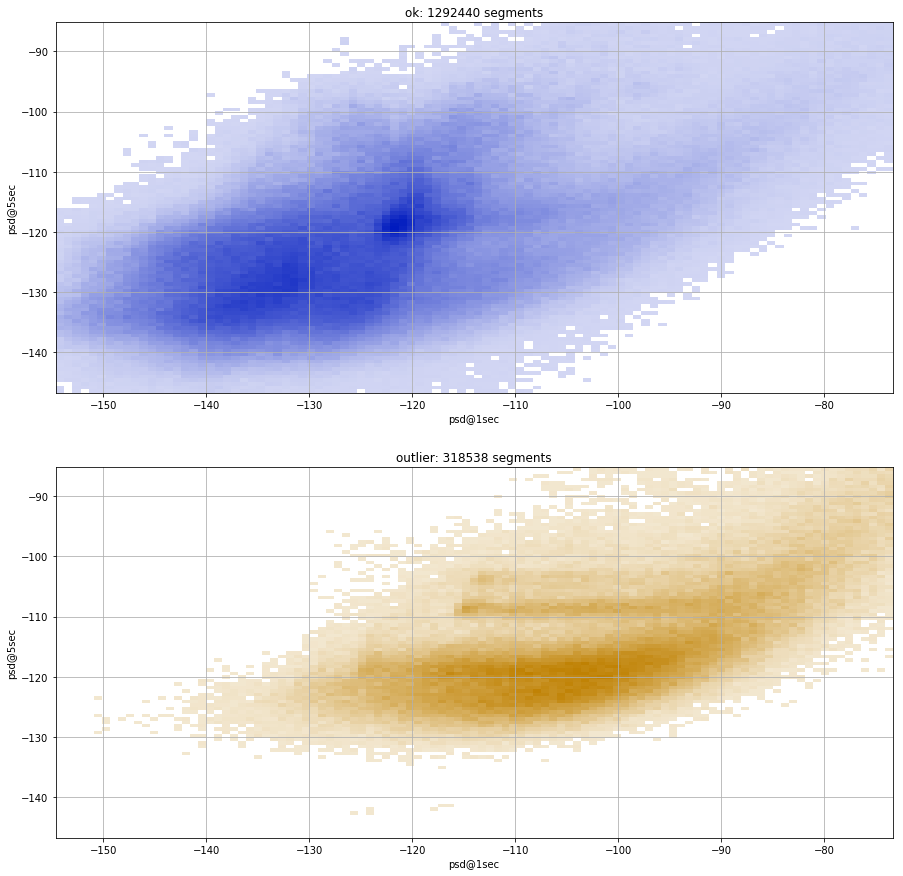

In [9]:
with plotparams({'figure.figsize': (15, 15)}):
    fig = sod_plot.plot(dfake, 'psd@1sec', 'psd@5sec', axis_lim=.990)

/Users/riccardo/work/gfz/projects/sources/python/sod/sod/core/plot.py:99: UserWarning: Dataframe is not bound to any implemented dataset, splitting classes based on the"outlier" column
  "\"%s\" column" % OUTLIER_COL)


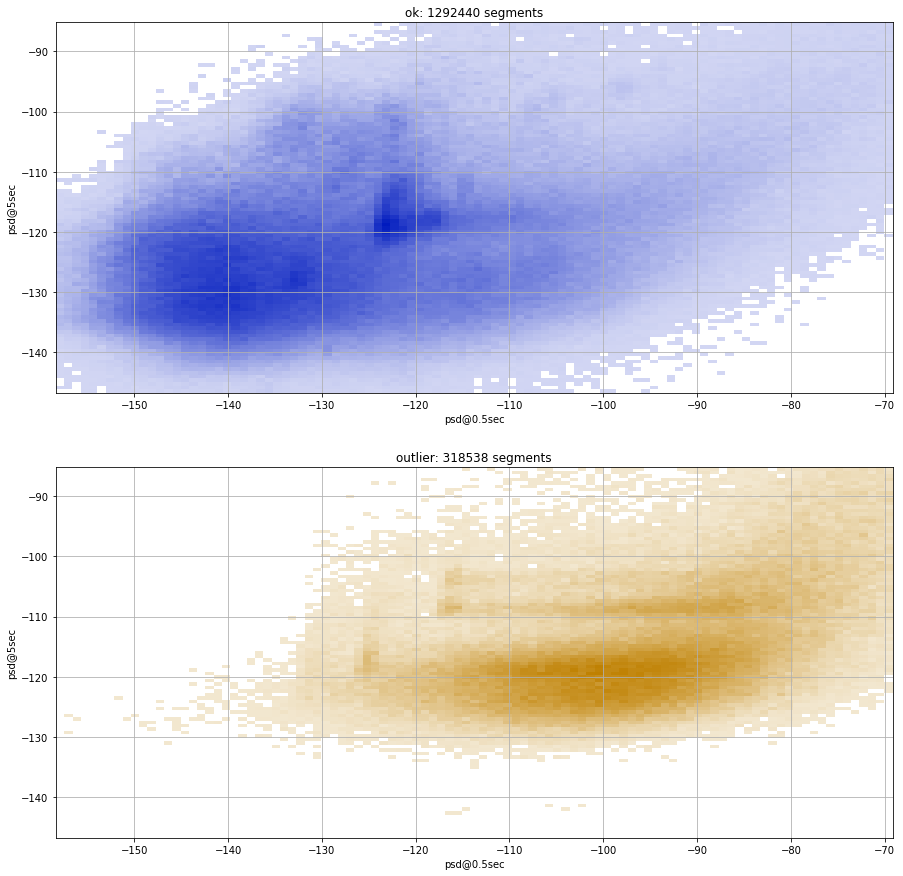

In [10]:
with plotparams({'figure.figsize': (15, 15)}):
    fig = sod_plot.plot(dfake, 'psd@0.5sec', 'psd@5sec', axis_lim=.990)

<h1>From here below some tests on an old OneClassSVM (IGNORE)</h1>

In [11]:
print(str(clf50))
print(clf50.support_vectors_)

OneClassSVM(cache_size=1500, coef0=0.0, degree=3, gamma=50, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)
[[0.95658065 0.94482111]
 [0.9562857  0.94520046]
 [0.95636838 0.9448346 ]
 ...
 [0.95794726 0.95295959]
 [0.96034659 0.95191952]
 [0.96032469 0.95183555]]


In [12]:
print(str(clf10))
print(clf10.support_vectors_)

OneClassSVM(cache_size=1500, coef0=0.0, degree=3, gamma=10, kernel='rbf',
            max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
            verbose=False)
[[0.95658065 0.94482111]
 [0.9562857  0.94520046]
 [0.95636838 0.9448346 ]
 ...
 [0.95794726 0.95295959]
 [0.96034659 0.95191952]
 [0.96032469 0.95183555]]


In [13]:
(clf10.support_vectors_ == clf50.support_vectors_).all()

False

In [15]:
clf10.support_vectors_[clf10.support_vectors_ != clf50.support_vectors_]

array([0.95988614, 0.95242531, 0.97544526, ..., 0.96331431, 0.95969826,
       0.95261706])

In [16]:
clf50.support_vectors_[clf10.support_vectors_ != clf50.support_vectors_]

array([0.97544526, 0.96510413, 0.95787776, ..., 0.96297347, 0.97448256,
       0.96331431])

In [17]:
len(clf10.support_vectors_)

93708

In [22]:
clf50.decision_function([[.96, .964], [.96, .965]])

array([ 37.86506508, -17.23445849])

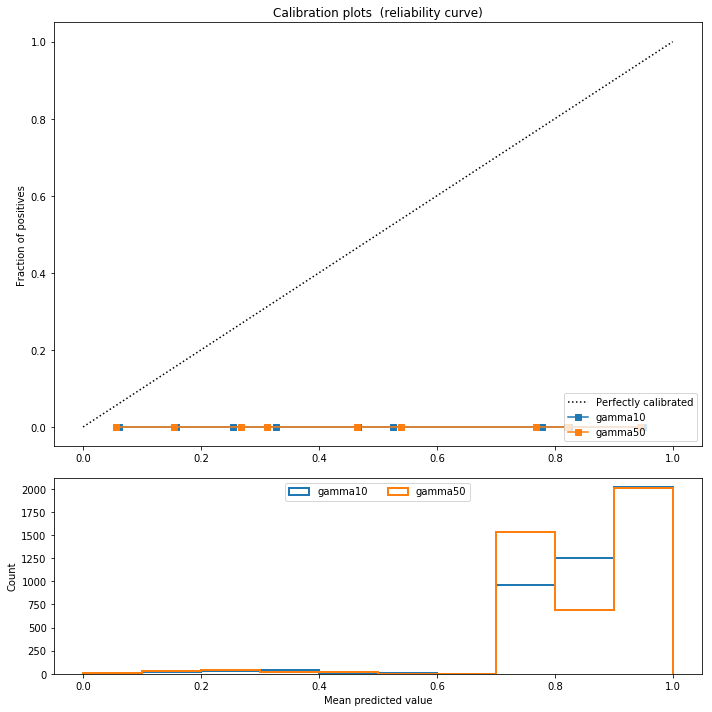

In [15]:
import importlib
import sod.plot as sod_plot
importlib.reload(sod_plot)
from sod.evaluation import is_out_wrong_inv
sod_plot.plot_calibration_curve(
    {'gamma10': clf10, 'gamma50':clf50}, dataframe[is_out_wrong_inv(dataframe)], ['psd@2sec', 'psd@5sec'])

Automatically created module for IPython interactive environment
[0 1 1 ... 0 0 1]
[0.0113659  0.9579489  0.98878331 ... 0.20863386 0.57549257 0.82257062]


RuntimeError: No active exception to reraise

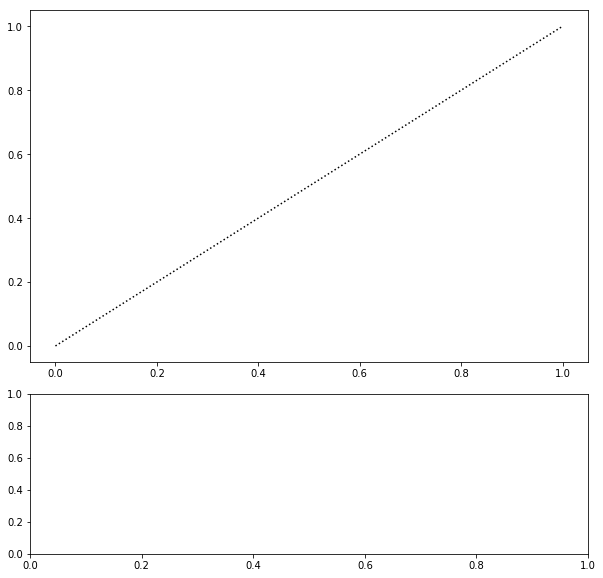

In [17]:
print(__doc__)

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Create classifiers
lr = LogisticRegression(solver='lbfgs')
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)
    print(y_test)
    print(prob_pos)
    raise

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()